In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from time import process_time
import seaborn as sns

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn import ensemble, preprocessing, metrics
from sklearn.metrics import classification_report, confusion_matrix

from keras.utils import np_utils
np.random.seed(10)
import csv

In [2]:
SDNdata = pd.read_csv("C:\pythonwork\dataset_sdn.csv")
print(SDNdata.describe())

                  dt         switch       pktcount     bytecount  \
count  104345.000000  104345.000000  104345.000000  1.043450e+05   
mean    17927.514169       4.214260   52860.954746  3.818660e+07   
std     11977.642655       1.956327   52023.241460  4.877748e+07   
min      2488.000000       1.000000       0.000000  0.000000e+00   
25%      7098.000000       3.000000     808.000000  7.957600e+04   
50%     11905.000000       4.000000   42828.000000  6.471930e+06   
75%     29952.000000       5.000000   94796.000000  7.620354e+07   
max     42935.000000      10.000000  260006.000000  1.471280e+08   

                 dur      dur_nsec       tot_dur          flows  \
count  104345.000000  1.043450e+05  1.043450e+05  104345.000000   
mean      321.497398  4.613880e+08  3.218865e+11       5.654234   
std       283.518232  2.770019e+08  2.834029e+11       2.950036   
min         0.000000  0.000000e+00  0.000000e+00       2.000000   
25%       127.000000  2.340000e+08  1.270000e+11    

# 資料前處理

In [3]:
#先把NULL值的資料Drop掉
SDNdata.dropna(inplace=True)
SDNdata.shape

(103839, 23)

In [4]:
fe=SDNdata.groupby('Protocol').size()/len(SDNdata)
SDNdata.loc[:,'Protocol']=SDNdata['Protocol'].map(fe)

In [5]:
fe=SDNdata.groupby('dst').size()/len(SDNdata)
SDNdata.loc[:,'dst']=SDNdata['dst'].map(fe)

In [6]:
fe=SDNdata.groupby('src').size()/len(SDNdata)
SDNdata.loc[:,'src']=SDNdata['src'].map(fe)

In [7]:
#把資料分為屬性和標籤，然後20%測試80%訓練
x = SDNdata.drop('label', axis=1)
y = SDNdata['label']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20,random_state=100)

In [8]:
#指定陣列
df_x_train =pd.DataFrame(x_train)
df_x_test =pd.DataFrame(x_test)
df_y_train =pd.DataFrame(y_train)
df_y_test =pd.DataFrame(y_test)

In [9]:
#標準化
minmax_scale = preprocessing.MinMaxScaler(feature_range=(0, 1))
scaled_x_train=minmax_scale.fit_transform(df_x_train)
scaled_x_test=minmax_scale.fit_transform(df_x_test)
scaled_y_train=minmax_scale.fit_transform(df_y_train)
scaled_y_test=minmax_scale.fit_transform(df_y_test)

In [10]:
scaled_x_train.shape

(83071, 22)

In [11]:
scaled_y_train.shape

(83071, 1)

In [12]:
scaled_x_test.shape

(20768, 22)

In [13]:
scaled_y_test.shape

(20768, 1)

In [14]:
X_train = np.reshape(scaled_x_train, (scaled_x_train.shape[0], 1, scaled_x_train.shape[1]))

X_test = np.reshape(scaled_x_test, (scaled_x_test.shape[0], 1, scaled_x_test.shape[1]))

In [15]:
X_train.shape

(83071, 1, 22)

In [16]:
X_test.shape

(20768, 1, 22)

# 建立模型

In [17]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN
from keras.layers import Dense, LSTM, Bidirectional

In [18]:
model = Sequential()

In [19]:
model.add(SimpleRNN(64,input_dim=22, return_sequences=True))

In [20]:
model.add(Dense(256,activation='relu'))

In [21]:
model.add(Dropout(0.35))

In [22]:
model.add(Dense(1,activation='sigmoid'))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, None, 64)          5568      
_________________________________________________________________
dense (Dense)                (None, None, 256)         16640     
_________________________________________________________________
dropout (Dropout)            (None, None, 256)         0         
_________________________________________________________________
dense_1 (Dense)              (None, None, 1)           257       
Total params: 22,465
Trainable params: 22,465
Non-trainable params: 0
_________________________________________________________________


# 訓練模型

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [25]:
start = process_time()
history = model.fit(X_train, scaled_y_train, epochs = 200,validation_split=0.2, verbose = 1,batch_size=1000)
stop = process_time()

Epoch 1/200
67/67 [==============================] - 3s 16ms/step - loss: 0.5563 - accuracy: 0.6740 - val_loss: 0.4656 - val_accuracy: 0.7427
Epoch 2/200
67/67 [==============================] - 1s 10ms/step - loss: 0.3921 - accuracy: 0.8065 - val_loss: 0.3407 - val_accuracy: 0.8482
Epoch 3/200
67/67 [==============================] - 1s 10ms/step - loss: 0.3088 - accuracy: 0.8644 - val_loss: 0.2788 - val_accuracy: 0.8878
Epoch 4/200
67/67 [==============================] - 1s 10ms/step - loss: 0.2635 - accuracy: 0.8857 - val_loss: 0.2399 - val_accuracy: 0.9032
Epoch 5/200
67/67 [==============================] - 1s 11ms/step - loss: 0.2299 - accuracy: 0.9024 - val_loss: 0.2100 - val_accuracy: 0.9161
Epoch 6/200
67/67 [==============================] - 1s 10ms/step - loss: 0.2062 - accuracy: 0.9146 - val_loss: 0.1882 - val_accuracy: 0.9275
Epoch 7/200
67/67 [==============================] - 1s 10ms/step - loss: 0.1889 - accuracy: 0.9229 - val_loss: 0.1711 - val_accuracy: 0.9363
Epoch 

67/67 [==============================] - 1s 10ms/step - loss: 0.0575 - accuracy: 0.9765 - val_loss: 0.0555 - val_accuracy: 0.9760
Epoch 59/200
67/67 [==============================] - 1s 11ms/step - loss: 0.0568 - accuracy: 0.9768 - val_loss: 0.0616 - val_accuracy: 0.9734
Epoch 60/200
67/67 [==============================] - 1s 10ms/step - loss: 0.0572 - accuracy: 0.9765 - val_loss: 0.0545 - val_accuracy: 0.9766
Epoch 61/200
67/67 [==============================] - 1s 10ms/step - loss: 0.0571 - accuracy: 0.9765 - val_loss: 0.0561 - val_accuracy: 0.9762
Epoch 62/200
67/67 [==============================] - 1s 10ms/step - loss: 0.0561 - accuracy: 0.9770 - val_loss: 0.0535 - val_accuracy: 0.9775
Epoch 63/200
67/67 [==============================] - 1s 11ms/step - loss: 0.0568 - accuracy: 0.9773 - val_loss: 0.0556 - val_accuracy: 0.9768
Epoch 64/200
67/67 [==============================] - 1s 13ms/step - loss: 0.0553 - accuracy: 0.9771 - val_loss: 0.0537 - val_accuracy: 0.9777
Epoch 65/200

67/67 [==============================] - 1s 9ms/step - loss: 0.0421 - accuracy: 0.9833 - val_loss: 0.0408 - val_accuracy: 0.9838
Epoch 116/200
67/67 [==============================] - 1s 9ms/step - loss: 0.0419 - accuracy: 0.9833 - val_loss: 0.0398 - val_accuracy: 0.9839
Epoch 117/200
67/67 [==============================] - 1s 10ms/step - loss: 0.0407 - accuracy: 0.9836 - val_loss: 0.0383 - val_accuracy: 0.9851
Epoch 118/200
67/67 [==============================] - 1s 9ms/step - loss: 0.0388 - accuracy: 0.9848 - val_loss: 0.0389 - val_accuracy: 0.9844
Epoch 119/200
67/67 [==============================] - 1s 9ms/step - loss: 0.0395 - accuracy: 0.9841 - val_loss: 0.0383 - val_accuracy: 0.9847
Epoch 120/200
67/67 [==============================] - 1s 10ms/step - loss: 0.0403 - accuracy: 0.9840 - val_loss: 0.0383 - val_accuracy: 0.9851
Epoch 121/200
67/67 [==============================] - 1s 10ms/step - loss: 0.0402 - accuracy: 0.9837 - val_loss: 0.0381 - val_accuracy: 0.9843
Epoch 122/

Epoch 172/200
67/67 [==============================] - 1s 10ms/step - loss: 0.0333 - accuracy: 0.9867 - val_loss: 0.0320 - val_accuracy: 0.9879
Epoch 173/200
67/67 [==============================] - 1s 9ms/step - loss: 0.0339 - accuracy: 0.9870 - val_loss: 0.0338 - val_accuracy: 0.9856
Epoch 174/200
67/67 [==============================] - ETA: 0s - loss: 0.0343 - accuracy: 0.98 - 1s 9ms/step - loss: 0.0345 - accuracy: 0.9862 - val_loss: 0.0332 - val_accuracy: 0.9869
Epoch 175/200
67/67 [==============================] - 1s 9ms/step - loss: 0.0351 - accuracy: 0.9857 - val_loss: 0.0342 - val_accuracy: 0.9844
Epoch 176/200
67/67 [==============================] - 1s 9ms/step - loss: 0.0348 - accuracy: 0.9861 - val_loss: 0.0334 - val_accuracy: 0.9864
Epoch 177/200
67/67 [==============================] - 1s 9ms/step - loss: 0.0356 - accuracy: 0.9856 - val_loss: 0.0327 - val_accuracy: 0.9858
Epoch 178/200
67/67 [==============================] - 1s 9ms/step - loss: 0.0333 - accuracy: 0.986

In [26]:
print("Time(s):",stop-start)

Time(s): 330.78125


# 效能評估

In [27]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

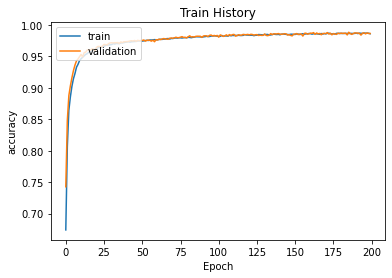

In [28]:
show_train_history(history,'accuracy','val_accuracy')

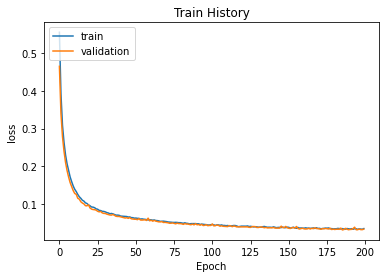

In [29]:
show_train_history(history,'loss','val_loss')

In [30]:
scores = model.evaluate(X_test, y_test)  
print()  
print("\t[Info] Accuracy of testing data = {:2.1f}%".format(scores[1]*100.0))

649/649 [==============================] - 2s 2ms/step - loss: 0.0306 - accuracy: 0.9875

	[Info] Accuracy of testing data = 98.7%
